In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from Bio import Phylo
import random

from vpod_scripts.phylo_weighted_cv import get_dist_matrix_from_tree, farthest_points, percentile_threshold, phylo_weighted_cv, plt_fold_phylo_distributions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
tree_file = "./trees/vpod_1.2/vpod_1.2_wt/wt_vpod_1.2_LG_F_R7.treefile"
dist_matrix, tip_names = get_dist_matrix_from_tree(tree_file)

In [59]:
percentile = 5
percentile_dist_threshold = percentile_threshold(dist_matrix, percentile=percentile)
percentile_dist_threshold

0.19441120957500002

In [83]:
# select number of folds to work off
model = 'wt'
n_folds = 5 
handeling_method = 'leave_out'
tip_to_fold = phylo_weighted_cv(distance_matrix=dist_matrix, tip_names=tip_names, n_folds=n_folds, distance_threshold=percentile_dist_threshold, relation_mode=handeling_method, shuffle_unassigned=True )

In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns

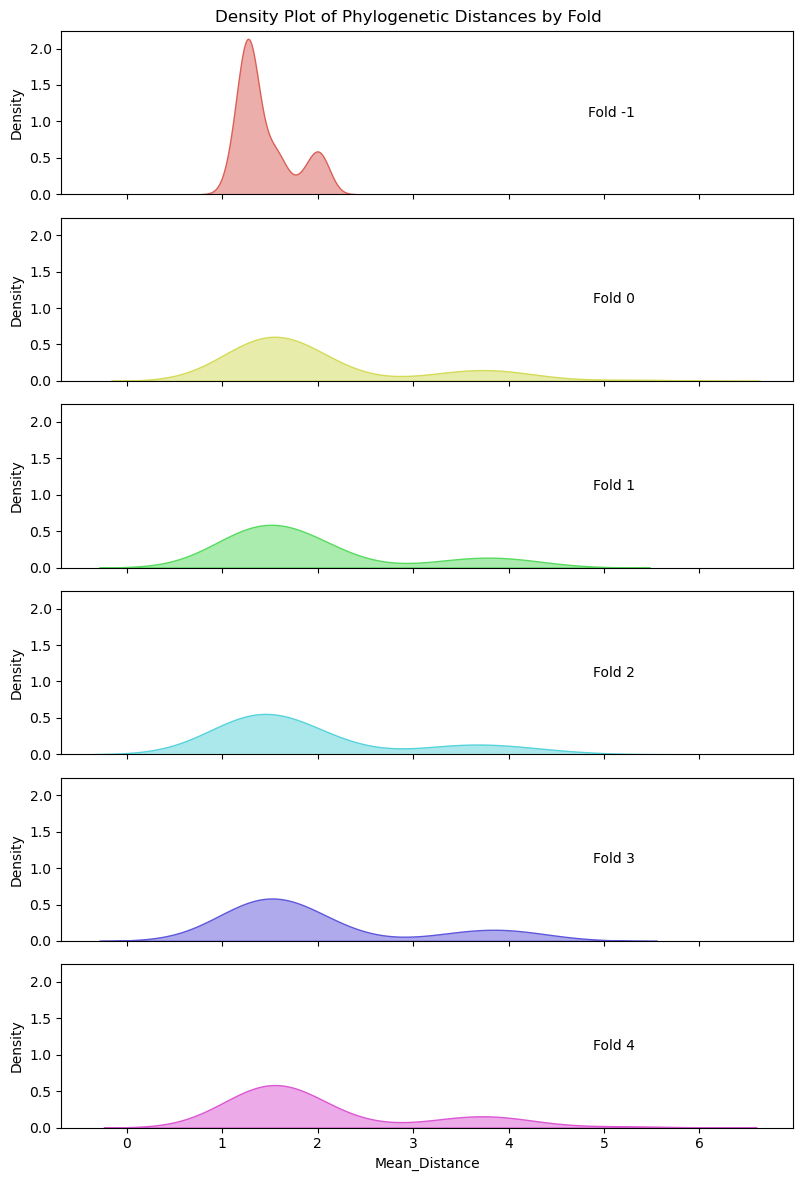

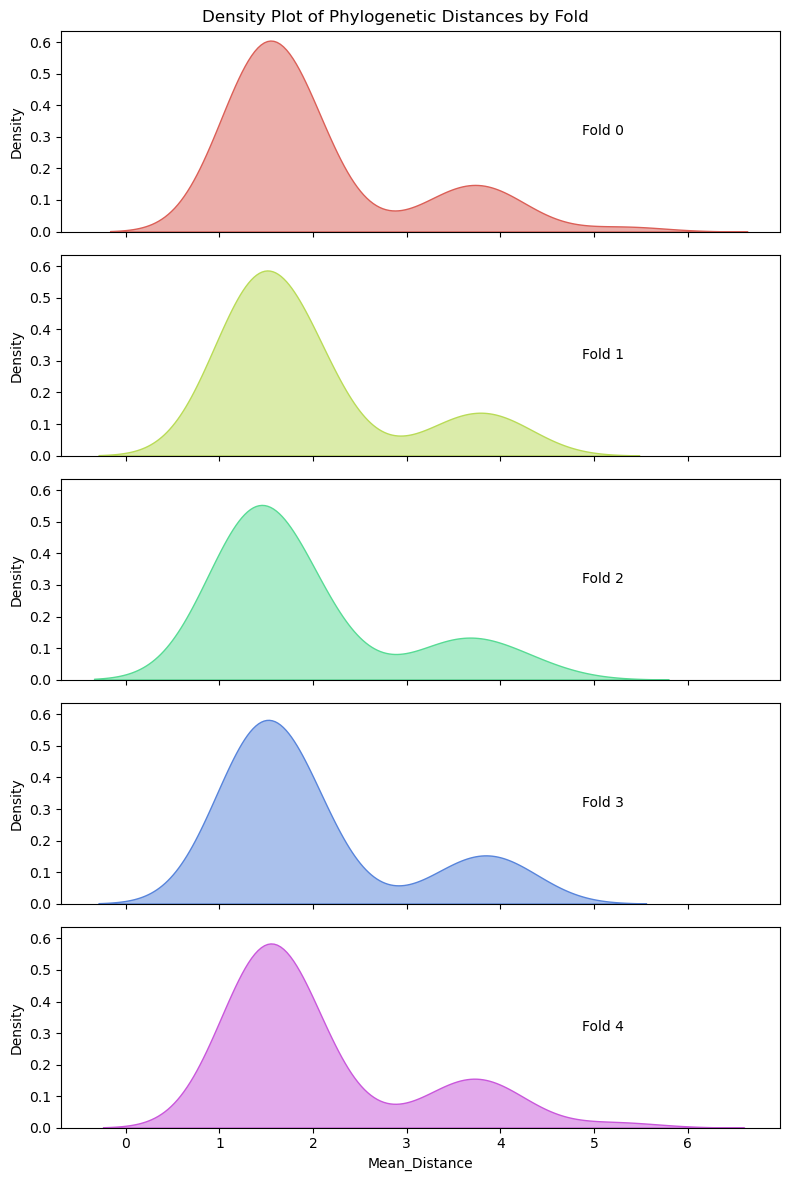

In [85]:
plt_fold_phylo_distributions(tip_to_fold=tip_to_fold, handeling_method=handeling_method, threshold=percentile, n_folds=n_folds, model=model)

In [86]:
unique_classes, class_counts = np.unique(tip_to_fold['Fold'].tolist(), return_counts=True)
print(class_counts)

[151  61  33  25  39  55]


In [87]:
indices = tip_to_fold.index  # Get indices from the DataFrame

In [88]:
from sklearn.model_selection import KFold

# Define cross-validation strategy
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create a new column for fold assignments
tip_to_fold['K-Fold'] = -1  # Initialize with -1 (unassigned)

# Assign fold labels
for fold_num, (train_indices, test_indices) in enumerate(kf.split(indices)):
    #print(f'These are the test indices for fold {fold_num}:\n{test_indices}')
    tip_to_fold['K-Fold'][test_indices.tolist()] = fold_num


In [89]:
kfold_list = tip_to_fold['K-Fold'].tolist()

In [90]:
unique_classes, class_counts = np.unique(kfold_list, return_counts=True)
print(class_counts)

[73 73 73 73 72]


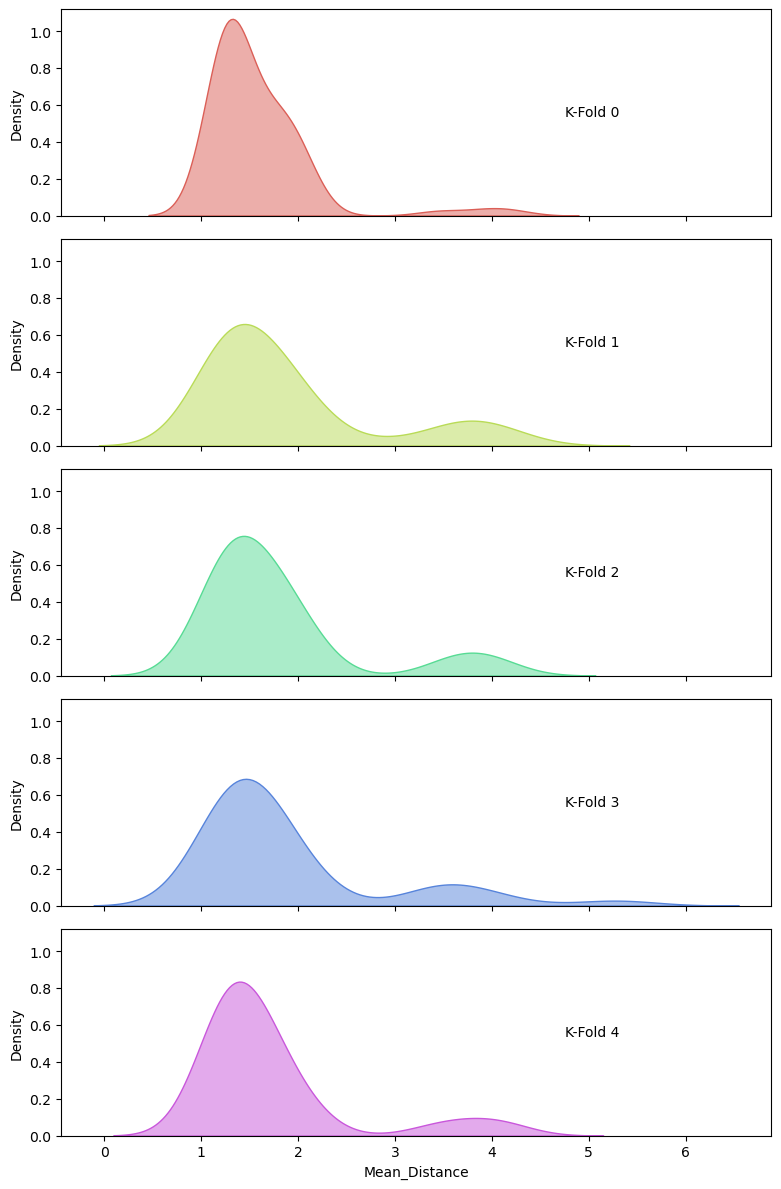

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of unique labels for subplot layout
num_labels = tip_to_fold['K-Fold'].nunique()
num_cols = 1  # You can adjust the number of columns as desired
num_rows = int(np.ceil(num_labels / num_cols))  # Calculate rows based on columns
# Generate Color Palette
colors = sns.color_palette("hls", num_labels)  # Use "hls" or your preferred palette
# Plotting with Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12), sharex=True, sharey=True)  # Create subplot grid
#fig.suptitle('Density Plot of Distances by Label')  # Overall figure title

# Flatten the axes array for easier iteration
axes = axes.flatten()
folds = tip_to_fold['K-Fold'].unique().tolist()
folds.sort()
# Calculate the mean of the first class
mean_class = tip_to_fold['Mean_Distance'].max()
# Plot each label's density on a separate subplot
for i, label in enumerate(folds):
    ax = axes[i]  # Get the current subplot axis
    label_data = tip_to_fold[tip_to_fold['K-Fold'] == label]['Mean_Distance']
    sns.kdeplot(label_data, fill=True, alpha=0.5,color=colors[i], ax=ax)
    # Add label text centered on the x-axis at the mean of Mean_Distance
    ylim = ax.get_ylim()
    ax.text(mean_class, ylim[0] + (ylim[1] - ylim[0])/2, f'K-Fold {label}',
            horizontalalignment='right', verticalalignment='center')


# Set shared labels only once (for the first subplot in each column and row)
for ax in axes[:]:
    ax.set_ylabel('Density')
    
# Turn off unused subplots
for i in range(num_labels, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.savefig(f'./{model}_random_kfcv_{n_folds}folds_phylo_distributions.svg', format='svg')  # You can change the filename if needed

plt.show()

In [92]:
from deepBreaks.preprocessing import read_data
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [93]:
# defining user params, file pathes, analysis type

#assign your path to folder containing all the datasplits
path = './vpod_1.2_data_splits_2025-02-28_15-51-04'
# path to sequences of interest
seqFileName = f'{path}/wt_aligned_VPOD_1.2_het.fasta' 
# path to corresponding metadata of interest
metaDataFileName = f'{path}/wt_meta.tsv' 

# name of the phenotype
mt = 'Lambda_Max'

# type of the sequences
seq_type = 'aa'

# type of the analysis if it is a classification model, then we put cl instead of reg
ana_type = 'reg' 

gap_threshold = 0.50

print('reading meta-data')
# importing metadata
meta_data = read_data(metaDataFileName, seq_type = None, is_main=False)
# importing sequences data
print('reading fasta file')
tr = read_data(seqFileName, seq_type = seq_type, is_main=True, gap_threshold=gap_threshold)

tr = tr.merge(meta_data.loc[:, mt],  left_index=True, right_index=True)
tr.shape

reading meta-data
reading fasta file


(364, 354)

In [94]:
tr.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p345,p346,p347,p348,p349,p350,p351,p352,p353,Lambda_Max
Bovine,M,N,G,T,E,G,P,N,F,Y,...,NaN,NaN,T,S,Q,V,A,P,A,500.0
S1,M,N,G,T,E,G,P,Y,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,502.0
S2,NaN,NaN,NaN,T,E,G,P,Y,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,502.0
S3,NaN,NaN,NaN,T,E,G,P,D,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,481.0
S4,NaN,NaN,NaN,T,E,G,P,F,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,494.0
S5,NaN,NaN,NaN,T,E,G,P,Y,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,494.0
S6,M,N,G,T,E,G,P,F,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,491.0
S7,NaN,NaN,NaN,T,E,G,P,Y,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,486.0
S8,NaN,NaN,NaN,T,E,G,P,D,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,490.0
S9,NaN,NaN,NaN,T,E,G,P,D,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,490.0


In [95]:
tr = tr.reindex(tip_to_fold.index)

In [96]:
tr.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p345,p346,p347,p348,p349,p350,p351,p352,p353,Lambda_Max
Tip_Names,,,,,,,,,,,,,,,,,,,,,
Bovine,M,N,G,T,E,G,P,N,F,Y,...,NaN,NaN,T,S,Q,V,A,P,A,500.0
S1,M,N,G,T,E,G,P,Y,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,502.0
S2,NaN,NaN,NaN,T,E,G,P,Y,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,502.0
S3,NaN,NaN,NaN,T,E,G,P,D,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,481.0
S8,NaN,NaN,NaN,T,E,G,P,D,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,490.0
S9,NaN,NaN,NaN,T,E,G,P,D,F,Y,...,A,NaN,NaN,S,S,V,S,P,A,490.0
S325,M,N,G,T,E,G,A,D,F,Y,...,NaN,NaN,NaN,S,S,V,S,P,A,449.0
S326,M,N,G,T,E,G,P,D,F,Y,...,NaN,NaN,S,S,S,V,S,P,A,448.0
S328,M,N,G,T,E,G,P,D,F,Y,...,NaN,NaN,S,S,S,V,S,P,A,455.0


In [97]:
tr['Fold'] = tip_to_fold['Fold']

In [98]:
tr['K-Fold'] = tip_to_fold['K-Fold']

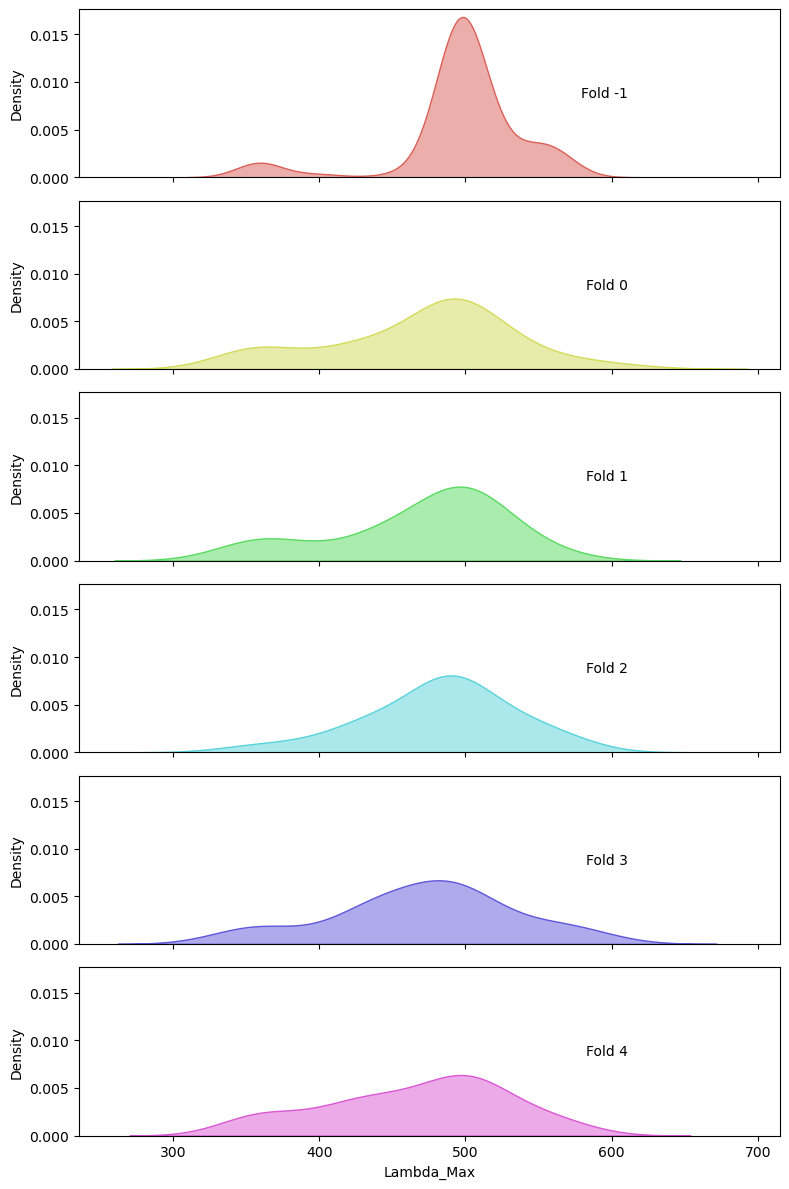

In [99]:
# Determine the number of unique labels for subplot layout
num_labels = tr['Fold'].nunique()
num_cols = 1  # You can adjust the number of columns as desired
num_rows = int(np.ceil(num_labels / num_cols))  # Calculate rows based on columns
# Generate Color Palette
colors = sns.color_palette("hls", num_labels)  # Use "hls" or your preferred palette
# Plotting with Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12), sharex=True, sharey=True)  # Create subplot grid
#fig.suptitle('Density Plot of Distances by Label')  # Overall figure title

# Flatten the axes array for easier iteration
axes = axes.flatten()
folds = tr['Fold'].unique().tolist()
folds.sort()
# Calculate the mean of the first class
mean_class = tr['Lambda_Max'].max()
# Plot each label's density on a separate subplot
for i, label in enumerate(folds):
    ax = axes[i]  # Get the current subplot axis
    label_data = tr[tr['Fold'] == label]['Lambda_Max']
    sns.kdeplot(label_data, fill=True, alpha=0.5,color=colors[i], ax=ax)
    # Add label text centered on the x-axis at the mean of Mean_Distance
    ylim = ax.get_ylim()
    ax.text(mean_class, ylim[0] + (ylim[1] - ylim[0])/2, f'Fold {label}',
            horizontalalignment='right', verticalalignment='center')


# Set shared labels only once (for the first subplot in each column and row)
for ax in axes[:]:
    ax.set_ylabel('Density')
    
# Turn off unused subplots
for i in range(num_labels, len(axes)):
    axes[i].set_axis_off()


plt.savefig(f'./{model}_percentile{percentile}_{handeling_method}_cv_{n_folds}fold_lmax_distributions.svg', format='svg')  # You can change the filename if needed
plt.tight_layout()
plt.show()

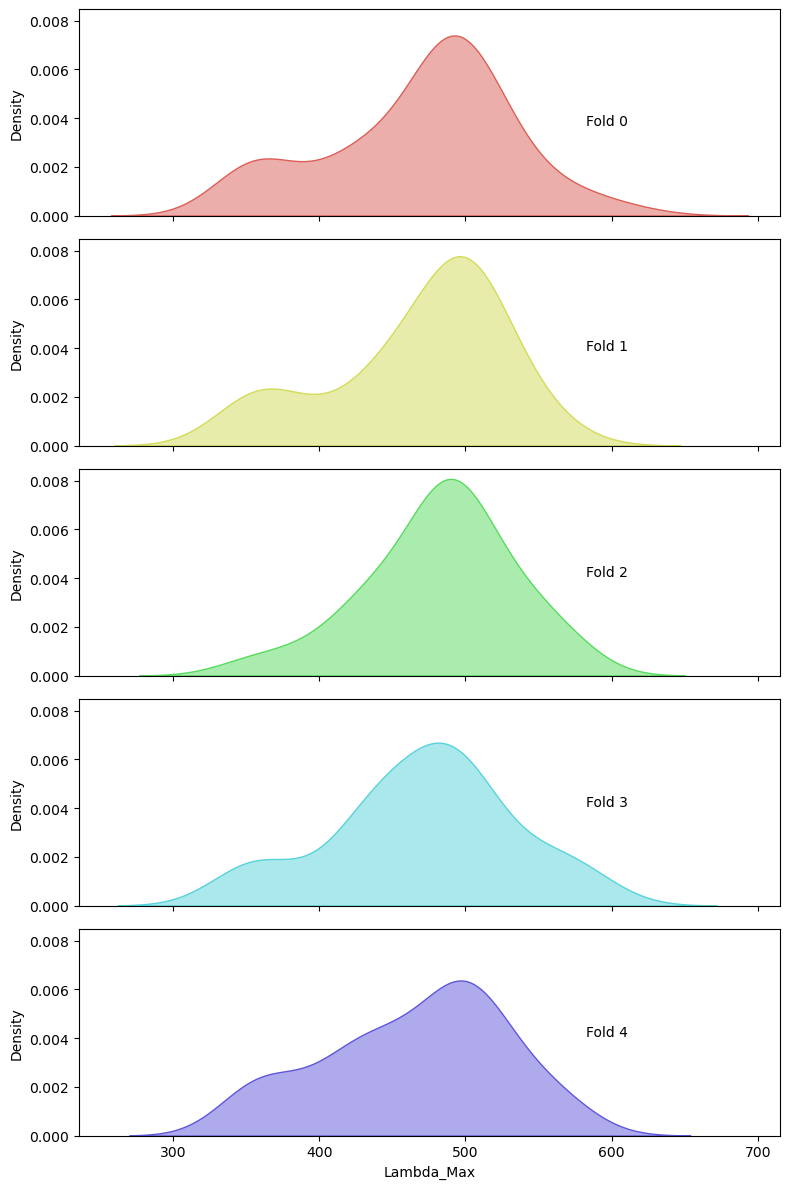

In [100]:
# Determine the number of unique labels for subplot layout
num_labels = tr['Fold'].nunique()
num_cols = 1  # You can adjust the number of columns as desired
num_rows = int(np.ceil(num_labels-1 / num_cols))  # Calculate rows based on columns
# Generate Color Palette
colors = sns.color_palette("hls", num_labels)  # Use "hls" or your preferred palette
# Plotting with Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12), sharex=True, sharey=True)  # Create subplot grid
#fig.suptitle('Density Plot of Distances by Label')  # Overall figure title

# Flatten the axes array for easier iteration
axes = axes.flatten()
folds = tr['Fold'].unique().tolist()
folds.sort()
# Calculate the mean of the first class
mean_class = tr['Lambda_Max'].max()
# Plot each label's density on a separate subplot
for i, label in enumerate(folds):
    if label == -1:
        pass
    else:
        ax = axes[i-1]  # Get the current subplot axis
        label_data = tr[tr['Fold'] == label]['Lambda_Max']
        sns.kdeplot(label_data, fill=True, alpha=0.5,color=colors[i-1], ax=ax)
        # Add label text centered on the x-axis at the mean of Mean_Distance
        ylim = ax.get_ylim()
        ax.text(mean_class, ylim[0] + (ylim[1] - ylim[0])/2, f'Fold {label}',
                horizontalalignment='right', verticalalignment='center')


# Set shared labels only once (for the first subplot in each column and row)
for ax in axes[:]:
    ax.set_ylabel('Density')
    
# Turn off unused subplots
for i in range(num_labels, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.savefig(f'./{model}_percentile{percentile}_{handeling_method}_cv_{n_folds}fold_lmax_distributions_noneg.svg', format='svg')  # You can change the filename if needed
plt.show()

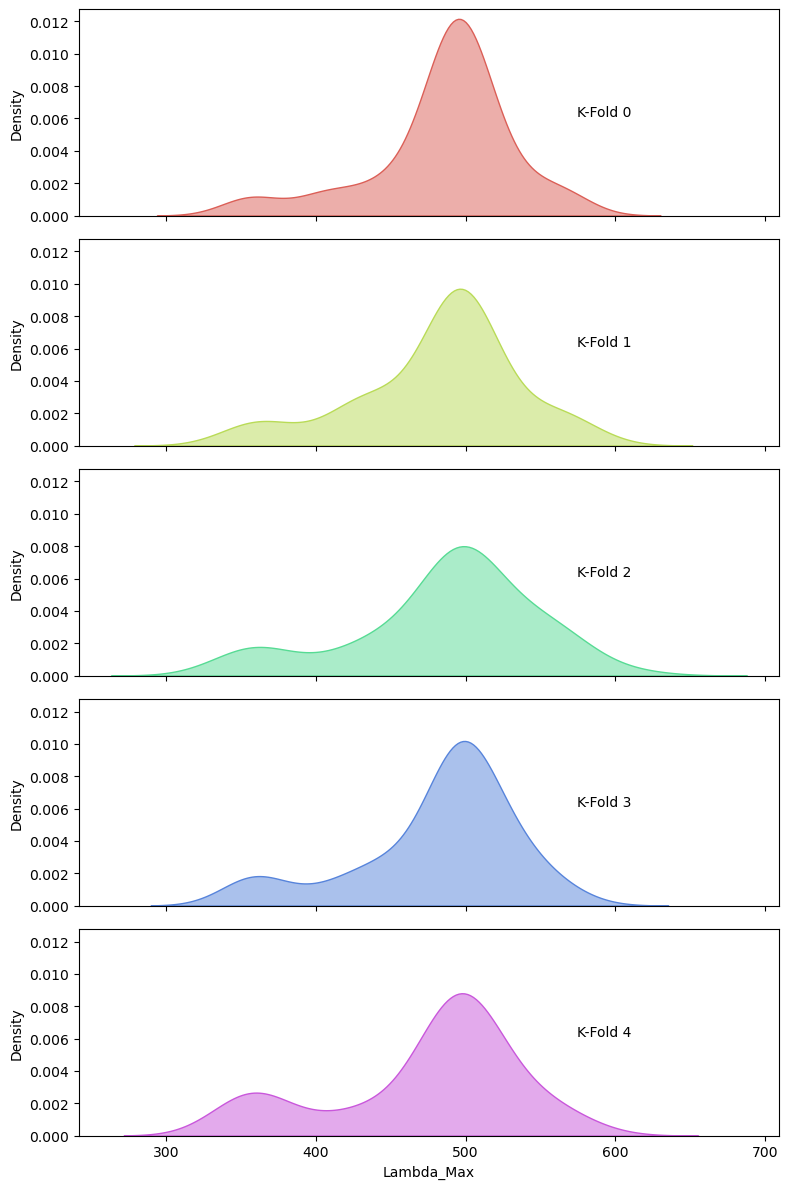

In [101]:
# Determine the number of unique labels for subplot layout
num_labels = tr['K-Fold'].nunique()
num_cols = 1  # You can adjust the number of columns as desired
num_rows = int(np.ceil(num_labels / num_cols))  # Calculate rows based on columns
# Generate Color Palette
colors = sns.color_palette("hls", num_labels)  # Use "hls" or your preferred palette
# Plotting with Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12), sharex=True, sharey=True)  # Create subplot grid
#fig.suptitle('Density Plot of Distances by Label')  # Overall figure title

# Flatten the axes array for easier iteration
axes = axes.flatten()
folds = tr['K-Fold'].unique().tolist()
folds.sort()
# Calculate the mean of the first class
mean_class = tr['Lambda_Max'].max()
# Plot each label's density on a separate subplot
for i, label in enumerate(folds):
    ax = axes[i]  # Get the current subplot axis
    label_data = tr[tr['K-Fold'] == label]['Lambda_Max']
    sns.kdeplot(label_data, fill=True, alpha=0.5,color=colors[i], ax=ax)
    # Add label text centered on the x-axis at the mean of Mean_Distance
    ylim = ax.get_ylim()
    ax.text(mean_class, ylim[0] + (ylim[1] - ylim[0])/2, f'K-Fold {label}',
            horizontalalignment='right', verticalalignment='center')


# Set shared labels only once (for the first subplot in each column and row)
for ax in axes[:]:
    ax.set_ylabel('Density')
    
# Turn off unused subplots
for i in range(num_labels, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.savefig(f'./{model}_kfcv_{n_folds}fold_lmax_distributions.svg', format='svg')  # You can change the filename if needed
plt.show()